In [191]:
#from src.utils.preprocessing import convert_all_files_to_csv
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import os
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [472]:
data_folder = '/home/theaiunicorn/datasets/hackQC2022'
case = 'cas_1'

In [393]:
def load_data(raw_name, gt_name, path):
    df_raw = pd.read_csv(os.path.join(path,case,raw_name))
    df_gt = pd.read_csv(os.path.join(path,case,gt_name))
    return df_raw, df_gt

def process_df(df):
    info = df.iloc[0]
    data = df.iloc[2: , :]
    data.reset_index(inplace = True, drop = True)
    columns = data.columns.values
    data.rename(columns = {columns[0]:'id',
                               columns[1]:'date',
                               columns[2]:'value'}, inplace = True)
    data['value'] = data['value'].astype(float)
    data['date']=pd.to_datetime(data['date'])
    data['year'] = data.apply(lambda row: row.date.year, axis = 1)
    data['month'] = data.apply(lambda row: row.date.month, axis = 1)
    data['day'] = data.apply(lambda row: row.date.day, axis = 1)
    data['hour'] = data.apply(lambda row: row.date.hour, axis = 1)
    data['minute'] = data.apply(lambda row: row.date.minute, axis = 1)
    data['second'] = data.apply(lambda row: row.date.second, axis = 1)
    data['time'] = data.apply(lambda row: str(row.hour) + str(row.minute) + str(row.second), axis = 1)
    data.drop(columns=['id'], inplace = True)
    return info, data

def merge_labels_and_raw(data_raw, data_gt):
    data_raw.rename(columns={'value':'raw'}, inplace = True)
    data_gt.rename(columns={'value':'labels'}, inplace = True)
    
    data = pd.merge(data_raw, data_gt, how = 'left', 
                    on=['date', 'year', 'month','day','hour','minute','second','time'])
    data['error'] = data.apply(lambda row: row.raw - row.labels, axis = 1)

    return data
def concat_labels_and_raw(data_raw, data_gt, get_error = False):
    data_raw['type'] = 'raw'
    data_gt['type'] = 'labels'
    
    data = pd.concat([data_raw, data_gt])
    return data

In [482]:
precipitation_name = "precip.csv"
df = pd.read_csv(os.path.join(data_folder,case,precipitation_name))
info_preci, data_preci = process_df(df)

In [484]:
data_preci.rename(columns={'Unnamed: 2':'value_2'}, inplace = True)

In [500]:
data_preci['value_2'] = data_preci['value_2'].astype(float)

In [502]:
this_year_preci = data_preci[data_preci['year'] == 2017]
this_year_preci['total_days'] = this_year_preci.apply(lambda row:row.day + total_days[row.month],
                                                  axis=1)

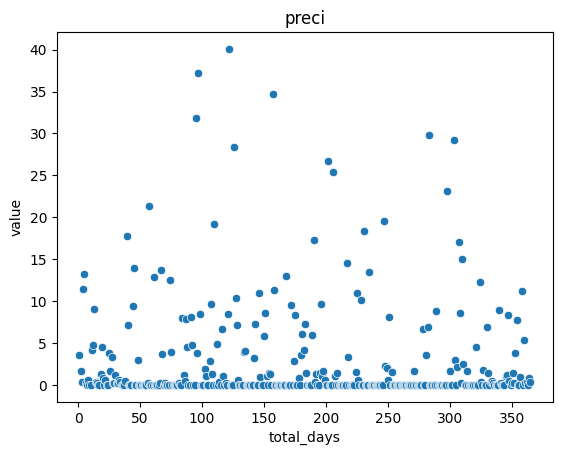

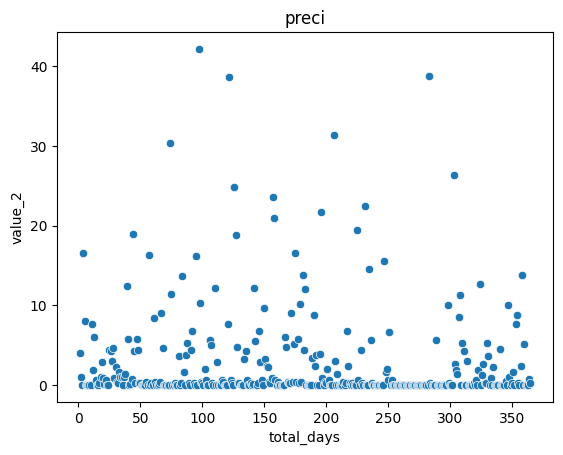

In [503]:
sns.scatterplot(data=this_year_preci, x="total_days", y="value")
plt.title('preci')
plt.show()

sns.scatterplot(data=this_year_preci, x="total_days", y="value_2")
plt.title('preci')
plt.show()

In [473]:
# gt_name = 'outardes_2_amont_2007_2015-valide.csv'
# raw_name = 'outardes_2_amont_2007_2015brutes.csv'

raw_name = 'quai_de_beauharnois_2007_2015_brutes.csv'
gt_name = 'quai_de_beauharnois_2007_2015_validees.csv'

df_raw, df_gt = load_data(raw_name, gt_name, data_folder)
info_raw, data_raw = process_df(df_raw)
info_gt, data_gt = process_df(df_gt)
data_amont = merge_labels_and_raw(data_raw, data_gt)
#data_amont = concat_labels_and_raw(data_raw, data_gt)

# gt_name = 'outardes_2_aval_2007_2015valide.csv'
# raw_name = 'outardes_2_aval_2007_2015brutes.csv'
raw_name = 'beauharnois_aval_2007_2015_brutes.csv'
gt_name = 'beauharnois_aval_2007_2015_validees.csv'

df_raw, df_gt = load_data(raw_name, gt_name, data_folder)
info_raw, data_raw = process_df(df_raw)
info_gt, data_gt = process_df(df_gt)
data_aval = merge_labels_and_raw(data_raw, data_gt)
#data_aval = concat_labels_and_raw(data_raw, data_gt)

/tmp/ipykernel_263236/1942316982.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(os.path.join(path,case,raw_name))
/tmp/ipykernel_263236/1942316982.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gt = pd.read_csv(os.path.join(path,case,gt_name))
/tmp/ipykernel_263236/1942316982.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(os.path.join(path,case,raw_name))
/tmp/ipykernel_263236/1942316982.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gt = pd.read_csv(os.path.join(path,case,gt_name))


In [474]:
year = 2007
month = 1
day = 4
to_view = 'day'

aval = {'year':this_year_aval,
       'month':this_month_aval,
       'day':this_day_aval}
amont = {'year':this_year_amont,
       'month':this_month_amont,
       'day':this_day_amont}

calanders = {1:31,
            2:28,
            3:31,
            4:30,
            5:31,
            6:30,
            7:31,
            8:31,
            9:30,
            10:31,
            11:30,
            12:31}
total_days = {}
for idx,key in enumerate(calanders):
    if idx == 0:
        total_days[key] = 0
    else:
        total_days[key] = total_days[key-1] + calanders[idx] 

In [475]:
this_year_amont = data_amont[data_amont['year'] == year]
this_month_amont = this_year_amont[this_year_amont['month'] == month]
this_day_amont = this_month_amont[this_month_amont['day'] == day]

this_year_aval = data_aval[data_aval['year'] == year]
this_month_aval = this_year_aval[this_year_aval['month'] == month]
this_day_aval = this_month_aval[this_month_aval['day'] == day]

In [476]:
this_year_aval['total_days'] = this_year_aval.apply(lambda row:row.day + total_days[row.month],
                                                  axis=1)
this_year_amont['total_days'] = this_year_amont.apply(lambda row:row.day + total_days[row.month],
                                                  axis=1)

In [477]:
min_aval_raw = np.min(this_year_aval.raw)
max_aval_raw = np.max(this_year_aval.raw)
min_aval_label = np.min(this_year_aval.labels)
max_aval_label = np.max(this_year_aval.labels)

time2numbers = {t:idx for idx,t in enumerate(this_year_aval.time.unique().tolist())}

raw_aval = np.zeros((len(time2numbers),len(this_year_aval.total_days.unique())))
label_aval = np.zeros((len(time2numbers),len(this_year_aval.total_days.unique())))
error_aval = np.zeros((len(time2numbers),len(this_year_aval.total_days.unique())))

for idx,row in this_year_aval.iterrows():
    raw_aval[time2numbers[row.time],row.total_days-1]= (row.raw - min_aval_raw)/(max_aval_raw-min_aval_raw)
    error_aval[time2numbers[row.time],row.total_days-1]= row.error
    label_aval[time2numbers[row.time],row.total_days-1]= (row.labels -min_aval_label)/(max_aval_label-min_aval_label)

min_amont_raw = np.min(this_year_amont.raw)
max_amont_raw = np.max(this_year_amont.raw)
min_amont_label = np.min(this_year_amont.labels)
max_amont_label = np.max(this_year_amont.labels)

time2numbers = {t:idx for idx,t in enumerate(this_year_amont.time.unique().tolist())}

raw_amont = np.zeros((len(time2numbers),len(this_year_amont.total_days.unique())))
label_amont = np.zeros((len(time2numbers),len(this_year_amont.total_days.unique())))
error_amont = np.zeros((len(time2numbers),len(this_year_amont.total_days.unique())))


for idx,row in this_year_amont.iterrows():
    raw_amont[time2numbers[row.time],row.total_days-1]= (row.raw - min_amont_raw)/(max_amont_raw-min_amont_raw)
    error_amont[time2numbers[row.time],row.total_days-1]= row.error
    label_amont[time2numbers[row.time],row.total_days-1]= (row.labels -min_amont_label)/(max_amont_label-min_amont_label)


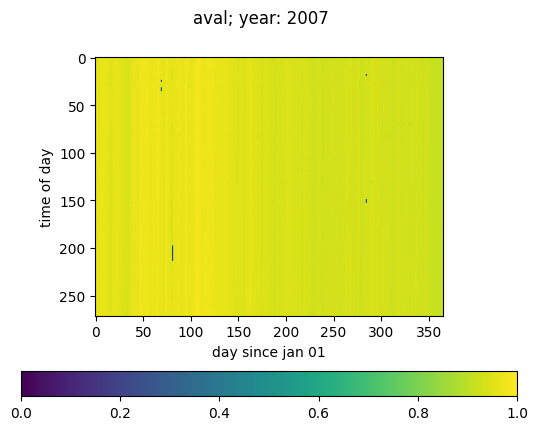

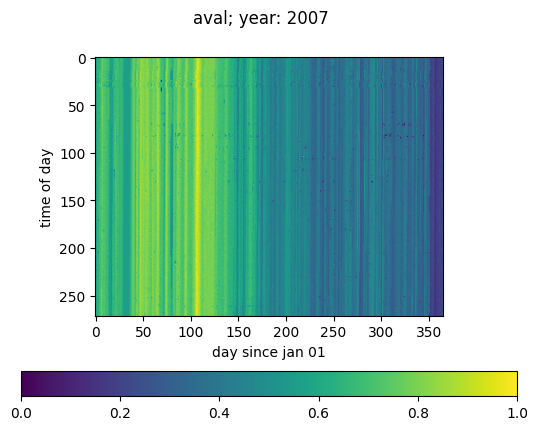

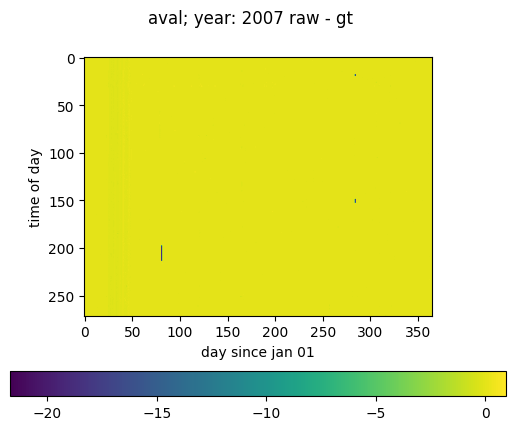

In [478]:
plt.imshow(raw_aval)
plt.colorbar(location='bottom')
plt.suptitle('aval; year: '+str(year))
plt.xlabel('day since jan 01')
plt.ylabel('time of day')
plt.savefig(os.path.join(data_folder,case,case+'_aval_2007.png'))
plt.show()

plt.imshow(label_aval)
plt.colorbar(location='bottom')
plt.suptitle('aval; year: '+str(year))
plt.xlabel('day since jan 01')
plt.ylabel('time of day')
plt.savefig(os.path.join(data_folder,case,case+'_aval_2007.png'))
plt.show()

plt.imshow(error_aval)
plt.colorbar(location='bottom')
plt.suptitle('aval; year: '+str(year) +' raw - gt')
plt.xlabel('day since jan 01')
plt.ylabel('time of day')
plt.savefig(os.path.join(data_folder,case,case+'_aval_error_2007.png'))
plt.show()

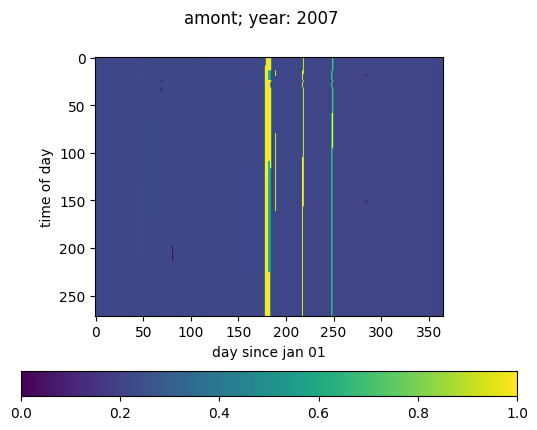

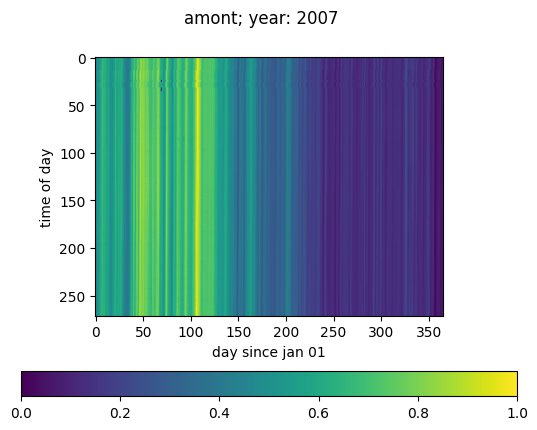

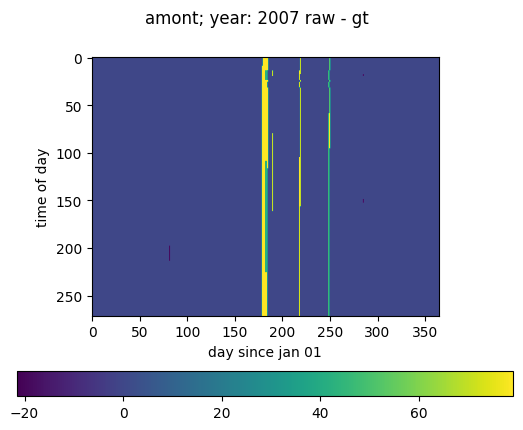

In [479]:
plt.imshow(raw_amont)
plt.colorbar(location='bottom')
plt.suptitle('amont; year: '+str(year))
plt.xlabel('day since jan 01')
plt.ylabel('time of day')
plt.savefig(os.path.join(data_folder,case,case+'_raw_amont_2007.png'))
plt.show()

plt.imshow(label_amont)
plt.colorbar(location='bottom')
plt.suptitle('amont; year: '+str(year))
plt.xlabel('day since jan 01')
plt.ylabel('time of day')
plt.savefig(os.path.join(data_folder,case,case+'_label_amont_2007.png'))
plt.show()

plt.imshow(error_amont)
plt.colorbar(location='bottom')
plt.suptitle('amont; year: '+str(year) +' raw - gt')
plt.xlabel('day since jan 01')
plt.ylabel('time of day')
plt.savefig(os.path.join(data_folder,case,case+'_aval_error_2007.png'))
plt.show()

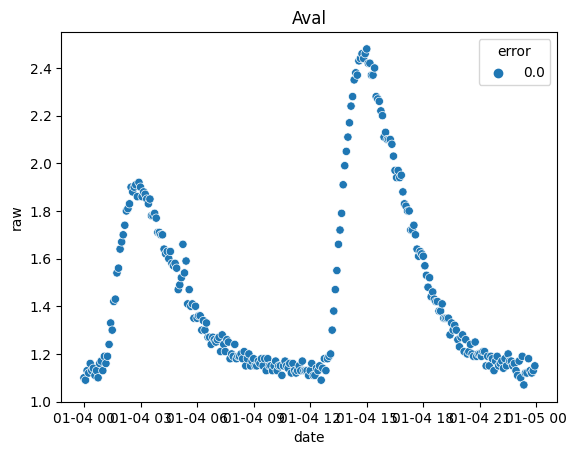

In [480]:
sns.scatterplot(data=aval[to_view], x="date", y="raw", hue="error")
plt.title('Aval')
plt.show()

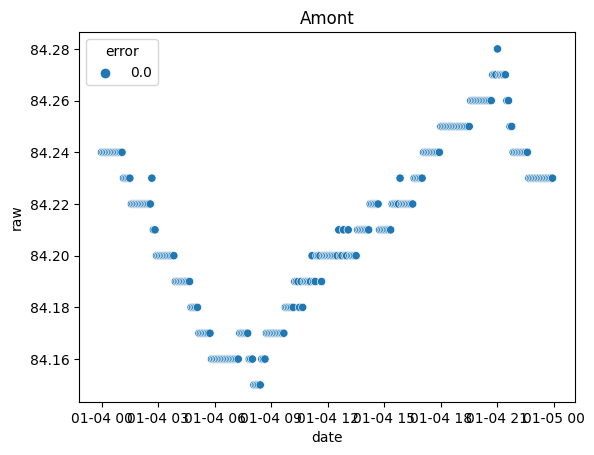

In [458]:
sns.scatterplot(data=amont[to_view], x="date", y="raw", hue="error")
plt.title('Amont')
plt.show()